In [1]:
import pandas as pd
import numpy as np

In [2]:
Medical_insurance_data = pd.read_csv('Medical_insurance_dataset.csv')

In [3]:
Medical_insurance_data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased


In [4]:
Medical_insurance_data.shape

(400, 5)

In [35]:
Medical_insurance_data['EstimatedSalary'].median()

70000.0

In [5]:
Medical_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
labels = label_encode.fit_transform(Medical_insurance_data['Purchased'])
Medical_insurance_data['Target'] = labels
Medical_insurance_data.drop(columns = ['User ID', 'Purchased'], axis=1, inplace=True)

In [8]:
Medical_insurance_data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Target             0
dtype: int64

In [9]:
Medical_insurance_data.describe()

,Age,EstimatedSalary,Target
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
Medical_insurance_data['Target'].value_counts()

0    257
1    143
Name: Target, dtype: int64

In [11]:
Medical_insurance_data.head()

,Gender,Age,EstimatedSalary,Target
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [14]:
Medical_insurance_data.groupby('Target').mean()

,Age,EstimatedSalary
Target,,
0,32.793774,60544.747082
1,46.391608,86272.727273


Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Target', ylabel='count'>

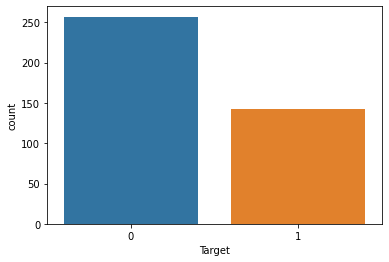

In [16]:
sns.countplot(x='Target', data=Medical_insurance_data)

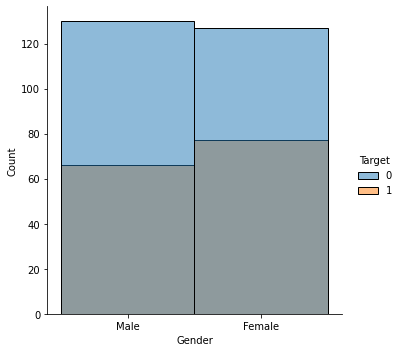

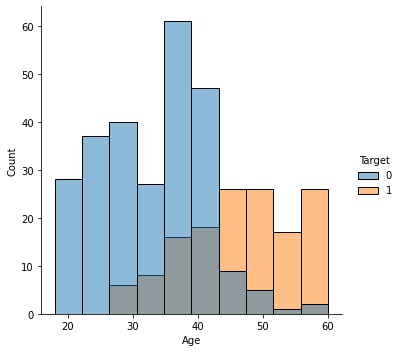

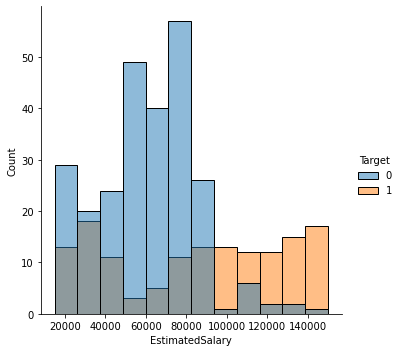

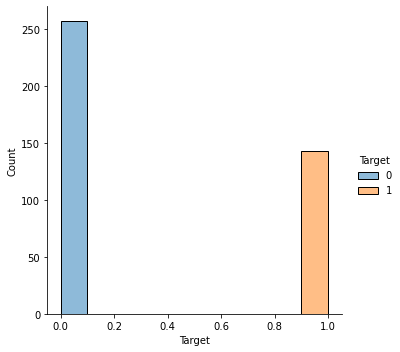

In [23]:
for column in Medical_insurance_data:
    sns.displot(x=column, data=Medical_insurance_data,hue='Target')

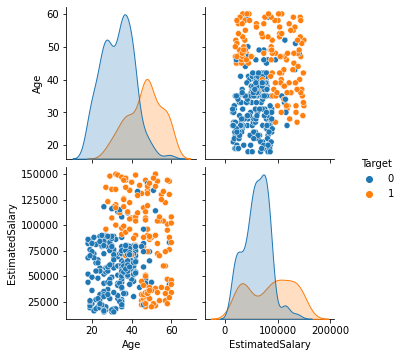

In [24]:
sns.pairplot(Medical_insurance_data, hue = 'Target')

<AxesSubplot:xlabel='Target', ylabel='EstimatedSalary'>

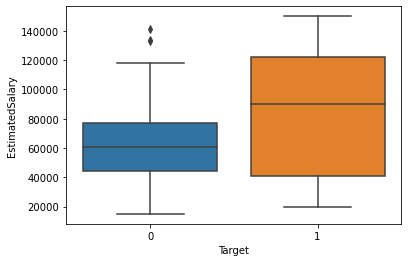

In [27]:
sns.boxplot(x='Target', y='EstimatedSalary', data=Medical_insurance_data)

<AxesSubplot:xlabel='Target', ylabel='Age'>

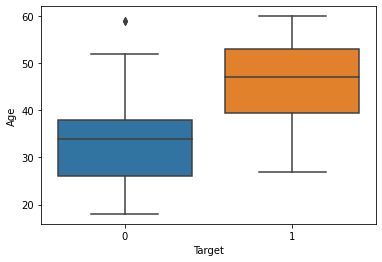

In [28]:
sns.boxplot(x='Target', y='Age', data=Medical_insurance_data)

<AxesSubplot:>

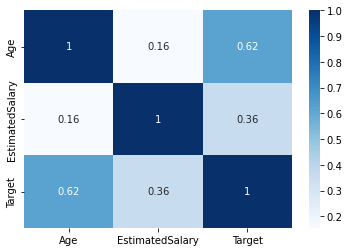

In [31]:
Medical_insurance_data_mx = Medical_insurance_data.corr()
sns.heatmap(Medical_insurance_data_mx, annot = True, cmap='Blues')

Inference from the data

1. The dataset has 400 rows and 5 columns
2. There is no missing values in the dataset
3. All variables have continuous numerical values except for Target and Gender columns
4. Mean is similar to the median for most of the features
5. There's quite an imbalance in the dataset (Not Purchased (0) are more than Purchased (1)). Refer count plot.
6. The features have outliers
7. Age has the highest correlation.

Insights from the data

1. Most people that visit the medical insurance company did not want to buy the insurance. This is an example of class imbalanced. That is, there is no equal of proportion of those that will buy or not.

2. Older people purchase the insurance more than young people

3. People that earn higher purchase insurance more than low income earners.
